<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/Actividad_6_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal 6 - Visualización**

# **Cargar datos**

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
input = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

##**Descripción de la base de datos**

Esta investigación empleó una variable binaria, pago por defecto **(Sí = 1, No = 0**), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes **23 variables** como variables explicativas:

*   **X1**: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

*   **X2**: Género (1 = masculino; 2 = femenino).

*   **X3**: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros)

*   **X4**: Estado civil (1 = casado; 2 = soltero; 3 = otros).

*   **X5**: Edad (año).

*   **X6 - X11**: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:

    *   **X6** = el estado de pago en septiembre de 2005;
    *   **X7** = el estado de pago en agosto de 2005;
    *   **X11** = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

*  **X12-X17**: Importe del estado de cuenta (dólar NT).  

    *   **X12** = monto del estado de cuenta en septiembre de 2005;
    *   **X13** = monto del estado de cuenta en agosto de 2005;
    *   **X17** = monto del estado de cuenta en abril de 2005.

*   **X18-X23**: Monto del pago anterior (dólar NT).

    *   **X18** = monto pagado en septiembre de 2005;
    *   **X19** = monto pagado en agosto de 2005;
    *   **X23** = monto pagado en abril de 2005. 

# **Cargar los datos**

Base de datos (DataFrame):

In [3]:
df_pca = pd.read_csv(input, index_col=0)
df_pca.index.name = None
df_pca

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [4]:
df_pca.shape

(30000, 24)

In [5]:
print(df_pca.describe)

<bound method NDFrame.describe of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19

El contendio de nuestro dataset es de de 30000 filas en 25 columnas.

#Renombramos las columnas

In [6]:
df_pca.rename(columns = {"X1": "Monto", "X2": "Genero", "X3": "Educacion", "X4" : "Estado_Civil", "X5" : "Edad",
                     "X6": "PAG_SEP", "X7": "PAG_AGO", "X8":"PAG_JUL", "X9": "PAG_JUN", "X10":"PAG_MAY", "X11": "AMORT.ABR", "X12": "ESTCTA_SEP", "X13": "ESTCTA_AGO", "X14": "ESTCTA_JUL", "X15":"ESTCTA_JUN",
                     "X16": "ESTCTA_MAY", "X17":"ESTCTA_ABR", "X18":"MP_SEP", "X19":"MP_AGO", "X20":"MP_JUL", "X21":"MP_JUN", "X22":"MP_MAY", "X23":"MP_ABR", "Y":"Var_Sal"}, inplace = True)
df_pca.head()

,Monto,Genero,Educacion,Estado_Civil,Edad,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,...,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,Var_Sal
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


2. Información de los datos

In [7]:
print("Columnas", df_pca.columns)

Columnas Index(['Monto', 'Genero', 'Educacion', 'Estado_Civil', 'Edad', 'PAG_SEP',
       'PAG_AGO', 'PAG_JUL', 'PAG_JUN', 'PAG_MAY', 'AMORT.ABR', 'ESTCTA_SEP',
       'ESTCTA_AGO', 'ESTCTA_JUL', 'ESTCTA_JUN', 'ESTCTA_MAY', 'ESTCTA_ABR',
       'MP_SEP', 'MP_AGO', 'MP_JUL', 'MP_JUN', 'MP_MAY', 'MP_ABR', 'Var_Sal'],
      dtype='object')


In [8]:
print("Tipos", df_pca.dtypes)

Tipos Monto             int64
Genero          float64
Educacion       float64
Estado_Civil    float64
Edad            float64
PAG_SEP         float64
PAG_AGO         float64
PAG_JUL         float64
PAG_JUN         float64
PAG_MAY         float64
AMORT.ABR       float64
ESTCTA_SEP      float64
ESTCTA_AGO      float64
ESTCTA_JUL      float64
ESTCTA_JUN      float64
ESTCTA_MAY      float64
ESTCTA_ABR      float64
MP_SEP          float64
MP_AGO          float64
MP_JUL          float64
MP_JUN          float64
MP_MAY          float64
MP_ABR          float64
Var_Sal         float64
dtype: object


In [9]:
#Información de las columnas
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Monto         30000 non-null  int64  
 1   Genero        29999 non-null  float64
 2   Educacion     29998 non-null  float64
 3   Estado_Civil  29998 non-null  float64
 4   Edad          29995 non-null  float64
 5   PAG_SEP       29997 non-null  float64
 6   PAG_AGO       29995 non-null  float64
 7   PAG_JUL       29993 non-null  float64
 8   PAG_JUN       29991 non-null  float64
 9   PAG_MAY       29984 non-null  float64
 10  AMORT.ABR     29986 non-null  float64
 11  ESTCTA_SEP    29989 non-null  float64
 12  ESTCTA_AGO    29989 non-null  float64
 13  ESTCTA_JUL    29987 non-null  float64
 14  ESTCTA_JUN    29985 non-null  float64
 15  ESTCTA_MAY    29983 non-null  float64
 16  ESTCTA_ABR    29990 non-null  float64
 17  MP_SEP        29992 non-null  float64
 18  MP_AGO        29991 non-nu

In [10]:
df_pca.isna().sum().sort_values(ascending=False)

ESTCTA_MAY      17
PAG_MAY         16
ESTCTA_JUN      15
AMORT.ABR       14
ESTCTA_JUL      13
ESTCTA_SEP      11
ESTCTA_AGO      11
MP_JUN          11
MP_MAY          11
ESTCTA_ABR      10
PAG_JUN          9
MP_AGO           9
MP_JUL           8
MP_SEP           8
PAG_JUL          7
PAG_AGO          5
Edad             5
MP_ABR           5
Var_Sal          3
PAG_SEP          3
Estado_Civil     2
Educacion        2
Genero           1
Monto            0
dtype: int64

In [11]:
df_pca.head(10)

,Monto,Genero,Educacion,Estado_Civil,Edad,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,...,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,Var_Sal
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [12]:
df_pca.shape

(30000, 24)

# Nos llevamos todos los valores vacíos

In [13]:
X = df_pca.iloc[0:, 0:25]
y = df_pca.iloc[:, -1]

In [14]:
X.shape

(30000, 24)

In [15]:
y.shape

(30000,)

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [16]:
df_pca.isnull().sum()

Monto            0
Genero           1
Educacion        2
Estado_Civil     2
Edad             5
PAG_SEP          3
PAG_AGO          5
PAG_JUL          7
PAG_JUN          9
PAG_MAY         16
AMORT.ABR       14
ESTCTA_SEP      11
ESTCTA_AGO      11
ESTCTA_JUL      13
ESTCTA_JUN      15
ESTCTA_MAY      17
ESTCTA_ABR      10
MP_SEP           8
MP_AGO           9
MP_JUL           8
MP_JUN          11
MP_MAY          11
MP_ABR           5
Var_Sal          3
dtype: int64

In [17]:
# Reemplazamos campos vacíos por 0 y dejamos 10 filas como muestra para trabajar
df_pca.dropna(axis = 0, inplace=True)
df_pca.head()

,Monto,Genero,Educacion,Estado_Civil,Edad,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,...,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,Var_Sal
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [18]:
df_pca.isna().any()

Monto           False
Genero          False
Educacion       False
Estado_Civil    False
Edad            False
PAG_SEP         False
PAG_AGO         False
PAG_JUL         False
PAG_JUN         False
PAG_MAY         False
AMORT.ABR       False
ESTCTA_SEP      False
ESTCTA_AGO      False
ESTCTA_JUL      False
ESTCTA_JUN      False
ESTCTA_MAY      False
ESTCTA_ABR      False
MP_SEP          False
MP_AGO          False
MP_JUL          False
MP_JUN          False
MP_MAY          False
MP_ABR          False
Var_Sal         False
dtype: bool

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [19]:
df_pca.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monto,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Genero,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Educacion,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
Estado_Civil,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Edad,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
PAG_SEP,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
PAG_AGO,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
PAG_JUL,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
PAG_JUN,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
PAG_MAY,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


5. Realiza el conteo de las variables categóricas

In [20]:
#Realizamos copia del DataFrame
df_pca_change = df_pca.copy()

In [21]:
Conteo_cat = df_pca_change.drop(["Monto", "ESTCTA_SEP", "ESTCTA_AGO", "ESTCTA_JUL", "ESTCTA_JUN", "ESTCTA_MAY", "ESTCTA_ABR", "MP_SEP", "MP_AGO", "MP_JUL", "MP_JUN", "MP_MAY", "MP_ABR"], axis = 1)
Conteo_cat

,Genero,Educacion,Estado_Civil,Edad,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
1,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
2,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
29998,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,1.0
29999,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0


In [22]:
Conteo_cat = list(df_pca.iloc[:,1:11])
Conteo_cat.remove('Edad')

In [23]:
print('Variables categóricas: ', Conteo_cat)

Variables categóricas:  ['Genero', 'Educacion', 'Estado_Civil', 'PAG_SEP', 'PAG_AGO', 'PAG_JUL', 'PAG_JUN', 'PAG_MAY', 'AMORT.ABR']


- Para **PCA** se trabaja con variables numéricas.

In [24]:
Conteo_num = df_pca_change.drop(["Genero", "Educacion", "Estado_Civil", "PAG_SEP", "PAG_AGO", "PAG_JUL", "PAG_JUN", "PAG_MAY", "AMORT.ABR", "Var_Sal"], axis = 1)
Conteo_num
Conteo_num.head()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [25]:
Conteo_num.corr()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
Monto,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Edad,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
ESTCTA_SEP,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
ESTCTA_AGO,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
ESTCTA_JUL,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
ESTCTA_JUN,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
ESTCTA_MAY,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
ESTCTA_ABR,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
MP_SEP,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
MP_AGO,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


6. Escalamos

In [27]:
scaler = StandardScaler()
scaled = scaler.fit_transform(Conteo_num)

scaled[:5]

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.25027025, -0.19195838,
        -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.22117899, -0.16944758,
        -0.22866662, -0.23793614, -0.2441877 , -0.23726923],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.22117899,  1.33396163,
         0.27084964,  0.26

7. Reduce las dimensiones con PCA, si consideras necesario:
  - Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [28]:
scaled_df = pd.DataFrame(scaled, columns=Conteo_num.columns)
scaled_df.head()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [29]:
col_num = ["Monto", "Edad", "ESTCTA_SEP",	"ESTCTA_AGO", "ESTCTA_JUL", "ESTCTA_JUN",	"ESTCTA_MAY", "ESTCTA_ABR", "MP_SEP",	"MP_AGO",	"MP_JUL",	"MP_JUN", "MP_MAY", "MP_ABR"]

summary = {
  "Varianzas": scaled_df[col_num].var()[0:11],
  "Valor Min": scaled_df[col_num].min()[0:11],
  "Valor Max": scaled_df[col_num].max()[0:11]
}
#recuerda que la variable col_num la definimos más arriba.
pd.DataFrame(summary, index = col_num).transpose()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,NaN,NaN,NaN
Valor Min,-1.214443,-1.571867,-2.943086,-1.670797,-2.944427,-3.313663,-2.000207,-6.352483,-0.341890,-0.257018,-0.296782,NaN,NaN,NaN
Valor Max,6.416489,4.722789,12.396047,13.126386,23.305872,13.179911,14.580173,15.487493,52.381623,72.795041,50.565325,NaN,NaN,NaN


In [30]:
t_gen = Conteo_num.var().sum()

In [31]:
var_Monto = Conteo_num.Monto.var()

print('Varianza Total \t:',t_gen.round(2) )
print('Varianza Monto :', ((var_Monto/t_gen)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza Monto : 37.03 %


In [32]:
t_MP_SEP = Conteo_num.var().sum()

var_Edad = Conteo_num.MP_SEP.var()

print('Varianza Total \t:', t_MP_SEP.round(2) )
print('Varianza MP_SEP:', ((var_Edad/t_MP_SEP)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza MP_SEP: 0.6 %


In [33]:
t_ESTCTA_SEP = Conteo_num.var().sum()

var_ESTCTA_SEP = Conteo_num.ESTCTA_SEP.var()

print('Varianza Total \t:', t_ESTCTA_SEP.round(2) )
print('Varianza Estado de Cuenta Septiembre 2005:', ((var_ESTCTA_SEP/t_ESTCTA_SEP)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza Estado de Cuenta Septiembre 2005: 11.94 %


In [34]:
df_varianza = PCA()
df_varianza.fit(Conteo_num.iloc[:, 0:].dropna(axis=0))
df_varianzaSummary= pd.DataFrame({'Standard deviation': np.sqrt(df_varianza.explained_variance_),
                             'Proportion of variance': df_varianza.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(df_varianza.explained_variance_ratio_)
                             })
df_varianzaSummary = df_varianzaSummary.transpose()
df_varianzaSummary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,166585.075260,115824.701657,37256.816552,27747.103018,20698.682256,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,10413.102035,8786.753999,8197.648912,9.113919e+00
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,0.002386,0.001699,0.001479,1.827572e-09
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,0.996823,0.998521,1.000000,1.000000e+00


8. Elabora los histogramas de los atributos para visualizar su distribución

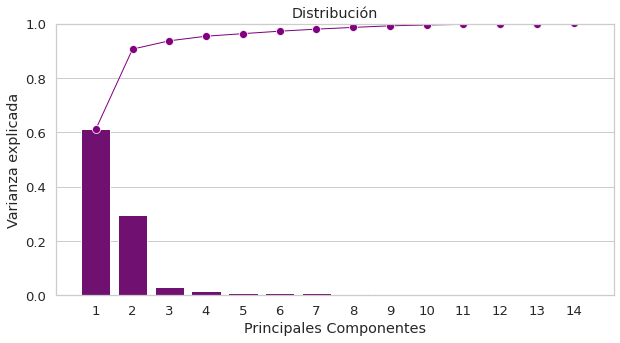

In [35]:
PC_components = np.arange(df_varianza.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 5))

_ = sns.barplot(x = PC_components, 
                y = df_varianza.explained_variance_ratio_, 
                color = 'purple'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(df_varianza.explained_variance_ratio_), 
                 color = 'purple', 
                 linestyle = '-', 
                 linewidth = 1, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Distribución')
plt.xlabel('Principales Componentes')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

In [36]:
((df_varianzaSummary.iloc[2][2])*100).round(0)

94.0

In [37]:
((df_varianzaSummary.iloc[2][1])*100).round(2)

90.57

In [38]:
df_varianzaSummary.columns = ['PC{}'.format(i) for i in range(1, len(df_varianzaSummary.columns) + 1)]
df_varianzaSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,9.1139
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.0000


In [39]:
df_varianza.components_

array([[ 4.91051249e-01,  5.56462827e-06,  3.88614777e-01,
         3.81500219e-01,  3.72316835e-01,  3.46509376e-01,
         3.23011793e-01,  3.08673561e-01,  2.65507164e-02,
         3.12770650e-02,  2.68070179e-02,  2.21621169e-02,
         2.21853695e-02,  2.48009681e-02],
       [ 8.69327754e-01,  8.29040076e-06, -2.21093578e-01,
        -2.26152724e-01, -2.16301840e-01, -1.93842429e-01,
        -1.76598449e-01, -1.67159508e-01,  5.71363887e-03,
         1.08089432e-02,  1.09872540e-02,  1.03870690e-02,
         1.16983563e-02,  1.53688818e-02],
       [-2.05568406e-02, -4.10147427e-06, -5.48883056e-01,
        -3.90963429e-01, -4.81292082e-02,  2.61019218e-01,
         4.28087752e-01,  4.83714530e-01,  3.74864969e-02,
         1.60057940e-01,  1.35142204e-01,  9.44275935e-02,
         5.58917508e-02, -2.09386269e-02],
       [-1.84118341e-02, -2.41286925e-07, -2.04861603e-01,
        -3.77746536e-02,  5.53447008e-01,  7.90910967e-02,
        -2.00097645e-01, -3.08367938e-01,  1.

In [40]:
pcsComponents_df = pd.DataFrame(df_varianza.components_.transpose(), 
                                columns = df_varianzaSummary.columns,
                                index = Conteo_num.iloc[:, 0:].columns
                                )
pcsComponents_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto,0.491051,0.869328,-0.020557,-1.841183e-02,-0.044128,0.016899,-0.001114,0.001028,0.009472,3.750818e-03,0.005828,0.000018,0.001869,-1.036322e-05
Edad,0.000006,0.000008,-0.000004,-2.412869e-07,-0.000005,0.000002,-0.000001,-0.000002,0.000007,-2.084484e-07,0.000005,-0.000009,-0.000002,1.000000e+00
ESTCTA_SEP,0.388615,-0.221094,-0.548883,-2.048616e-01,0.316883,0.002628,-0.456336,0.007253,0.070332,1.726640e-01,-0.267354,-0.204612,-0.005862,-2.626138e-06
ESTCTA_AGO,0.381500,-0.226153,-0.390963,-3.777465e-02,0.011474,-0.080547,0.526906,-0.066039,0.099272,7.921287e-03,0.351050,0.476459,0.015960,7.238483e-07
ESTCTA_JUL,0.372317,-0.216302,-0.048129,5.534470e-01,-0.247591,0.295830,0.028716,0.081260,-0.108043,-3.365400e-01,0.151470,-0.441650,-0.082454,-6.009492e-06
ESTCTA_JUN,0.346509,-0.193842,0.261019,7.909110e-02,-0.367888,-0.473240,-0.178228,-0.227742,-0.097404,-1.369191e-01,-0.374919,0.233508,0.318929,4.213201e-06
ESTCTA_MAY,0.323012,-0.176598,0.428088,-2.000976e-01,-0.015793,-0.078343,-0.013436,0.480093,0.126480,1.009797e-01,-0.052465,0.092393,-0.605506,1.563479e-06
ESTCTA_ABR,0.308674,-0.167160,0.483715,-3.083679e-01,0.226878,0.391800,0.076828,-0.262898,-0.105467,2.368137e-01,0.203118,-0.158543,0.366214,6.051477e-07
MP_SEP,0.026551,0.005714,0.037486,1.934771e-01,0.202460,-0.228048,0.611722,-0.082590,0.170884,2.791503e-01,-0.470900,-0.396527,-0.017225,-1.491517e-07
MP_AGO,0.031277,0.010809,0.160058,6.733127e-01,0.337296,0.107598,-0.254751,-0.004666,0.226391,3.580915e-01,0.023462,0.383966,0.046985,3.551963e-06


- Preprocesamiento

In [41]:
pcsComponents_dfX = pd.DataFrame(df_varianza.components_.transpose(), 
                                columns = df_varianzaSummary.columns,
                                index = Conteo_num.iloc[:, 0:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto,0.491051,0.869328,-0.020557,-1.841183e-02,-0.044128,0.016899,-0.001114,0.001028,0.009472,3.750818e-03,0.005828,0.000018,0.001869,-1.036322e-05
Edad,0.000006,0.000008,-0.000004,-2.412869e-07,-0.000005,0.000002,-0.000001,-0.000002,0.000007,-2.084484e-07,0.000005,-0.000009,-0.000002,1.000000e+00
ESTCTA_SEP,0.388615,-0.221094,-0.548883,-2.048616e-01,0.316883,0.002628,-0.456336,0.007253,0.070332,1.726640e-01,-0.267354,-0.204612,-0.005862,-2.626138e-06
ESTCTA_AGO,0.381500,-0.226153,-0.390963,-3.777465e-02,0.011474,-0.080547,0.526906,-0.066039,0.099272,7.921287e-03,0.351050,0.476459,0.015960,7.238483e-07
ESTCTA_JUL,0.372317,-0.216302,-0.048129,5.534470e-01,-0.247591,0.295830,0.028716,0.081260,-0.108043,-3.365400e-01,0.151470,-0.441650,-0.082454,-6.009492e-06
ESTCTA_JUN,0.346509,-0.193842,0.261019,7.909110e-02,-0.367888,-0.473240,-0.178228,-0.227742,-0.097404,-1.369191e-01,-0.374919,0.233508,0.318929,4.213201e-06
ESTCTA_MAY,0.323012,-0.176598,0.428088,-2.000976e-01,-0.015793,-0.078343,-0.013436,0.480093,0.126480,1.009797e-01,-0.052465,0.092393,-0.605506,1.563479e-06
ESTCTA_ABR,0.308674,-0.167160,0.483715,-3.083679e-01,0.226878,0.391800,0.076828,-0.262898,-0.105467,2.368137e-01,0.203118,-0.158543,0.366214,6.051477e-07
MP_SEP,0.026551,0.005714,0.037486,1.934771e-01,0.202460,-0.228048,0.611722,-0.082590,0.170884,2.791503e-01,-0.470900,-0.396527,-0.017225,-1.491517e-07
MP_AGO,0.031277,0.010809,0.160058,6.733127e-01,0.337296,0.107598,-0.254751,-0.004666,0.226391,3.580915e-01,0.023462,0.383966,0.046985,3.551963e-06


In [42]:
df_varianzaSummary.iloc[:, 0:].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.075260,115824.701657,37256.816552,27747.103018,20698.682256,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,10413.102035,8786.753999,8197.648912,9.113919e+00
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,0.002386,0.001699,0.001479,1.827572e-09
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,0.996823,0.998521,1.000000,1.000000e+00


In [43]:
pcs = PCA()
pcs.fit(preprocessing.scale(df_varianzaSummary.iloc[:, 0:].dropna(axis=0)))

PCA()

In [44]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3
Standard deviation,4.5811,0.1180,0.0
Proportion of variance,0.9993,0.0007,0.0
Cumulative proportion,0.9993,1.0000,1.0


In [45]:
pcsSummary_df.iloc[0,2]

6.213533547945123e-16

- Decomposición

In [46]:
pcs = PCA()

In [47]:
pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:14]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00,
        -1.76466173e-01,  1.78476835e-02,  2.77646145e-03,
         1.29010046e-02,  5.80885205e-02,  2.21268695e-01,
         2.02066015e-02,  1.68710287e-02, -3.14858410e-03,
         8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01,
        -2.80889399e-01,  4.94098943e-02, -1.18062416e-01,
         9.91641641e-02,  7.52386637e-02, -2.87026648e-01,
        -7.30485666e-02, -5.57769745e-03,  1.22574823e-02,
        -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01,
        -7.66632559e-03,  1.26938297e-01, -6.20521778e-02,
        -1.40071875e-02,  8.40632249e-02,  2.82844658e-01,
        -1.60703686e-02,  1.12401687e-01, -8.04550604e-02,
        -4.13466939e-02, -5.71189238e-02],
       [-5.41595290e-01, -6.66646687e-01,  9.76280692e-02,
         2.92571245e-01,  8.85437669e-03,  1.09430096e-01,
        -1.34229136e-01,  6.32182383e-02,  5.

• El % de la varianza explicada por cada componente

• El acumulado de la varianza explicada por cada componente

In [48]:
pcsSummary_df = pd.DataFrame({
                              '% varianza explicada': np.round(pcs.
                                                               explained_variance_ratio_,4) * 100,
                              '% varianza acumulada': np.cumsum(pcs.
                                                                explained_variance_ratio_) * 100})
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


**Agregamos etiquetas**

In [49]:
#Lista de nombre de los componentes

pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [50]:
#colocamos valores de cada componente
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)

print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [51]:
total_var =scaled_df.var().sum()

pd.DataFrame({
  "Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
  "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Monto,7.142857,7.142857
Edad,7.142857,14.285714
ESTCTA_SEP,7.142857,21.428571
ESTCTA_AGO,7.142857,28.571429
ESTCTA_JUL,7.142857,35.714286
ESTCTA_JUN,7.142857,42.857143
ESTCTA_MAY,7.142857,50.000000
ESTCTA_ABR,7.142857,57.142857
MP_SEP,7.142857,64.285714
MP_AGO,7.142857,71.428571


**Composición de cada componente arrojado por PCA**

In [52]:
comps_df = pd.DataFrame(
  pcs.components_.round(4), # pcs.components  = pesos de cada uno de los componentes
  columns = pcs_df.columns,
  index = scaled_df.columns) 
comps_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885,0.3807,0.1351,0.1168,0.1281,0.1169,0.1137,0.1055
Edad,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942,0.3832,0.4084,0.3923,0.3496,0.3039,0.3235
ESTCTA_SEP,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339,0.0185,0.1738,0.2009,0.1221,0.0623,-0.0609,-0.0509
ESTCTA_AGO,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396,-0.0706,0.3621,0.3457,0.2447,-0.0947,-0.6098,-0.3657
ESTCTA_JUL,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068,-0.1650,0.2257,0.1487,-0.2396,-0.5778,-0.1934,0.6592
ESTCTA_JUN,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693,0.0406,0.4084,-0.1082,-0.5008,0.6024,-0.4092
ESTCTA_MAY,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076,0.0079,-0.2016,-0.2788,0.7852,-0.4622,0.0143,0.0255
ESTCTA_ABR,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498,-0.0003,-0.7487,0.5785,0.0682,0.0778,-0.1649,0.1813
MP_SEP,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237,0.0587,0.0199,-0.1107,0.1530,0.0988,0.2529,0.3167
MP_AGO,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200,-0.4889,-0.0566,0.0509,0.1449,0.1241,0.0600,-0.0992


In [113]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [54]:
comps_df.iloc[:,:7].abs().idxmax()

PC1        MP_SEP
PC2    ESTCTA_SEP
PC3        MP_AGO
PC4        MP_ABR
PC5        MP_ABR
PC6        MP_JUL
PC7        MP_MAY
dtype: object

In [55]:
comps_df.iloc[:,:14].abs().idxmax()

PC1         MP_SEP
PC2     ESTCTA_SEP
PC3         MP_AGO
PC4         MP_ABR
PC5         MP_ABR
PC6         MP_JUL
PC7         MP_MAY
PC8         MP_JUL
PC9     ESTCTA_ABR
PC10    ESTCTA_ABR
PC11    ESTCTA_MAY
PC12    ESTCTA_JUL
PC13    ESTCTA_AGO
PC14    ESTCTA_JUL
dtype: object

In [56]:
comps_df.abs().idxmax()

PC1         MP_SEP
PC2     ESTCTA_SEP
PC3         MP_AGO
PC4         MP_ABR
PC5         MP_ABR
PC6         MP_JUL
PC7         MP_MAY
PC8         MP_JUL
PC9     ESTCTA_ABR
PC10    ESTCTA_ABR
PC11    ESTCTA_MAY
PC12    ESTCTA_JUL
PC13    ESTCTA_AGO
PC14    ESTCTA_JUL
dtype: object

In [57]:
comps_df.PC1.abs().nlargest(5)

MP_SEP        0.8220
ESTCTA_SEP    0.3786
Edad          0.3007
ESTCTA_AGO    0.2001
Monto         0.1655
Name: PC1, dtype: float64

In [58]:
comps_df.PC1.idxmax()

'Edad'

In [59]:
comps_df.PC2.idxmin()

'ESTCTA_SEP'

In [60]:
comps_df.PC2.abs().nsmallest(5)

MP_JUL    0.0001
MP_MAY    0.0001
MP_ABR    0.0011
MP_JUN    0.0014
MP_AGO    0.0090
Name: PC2, dtype: float64

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

#**Correlación entre variables**

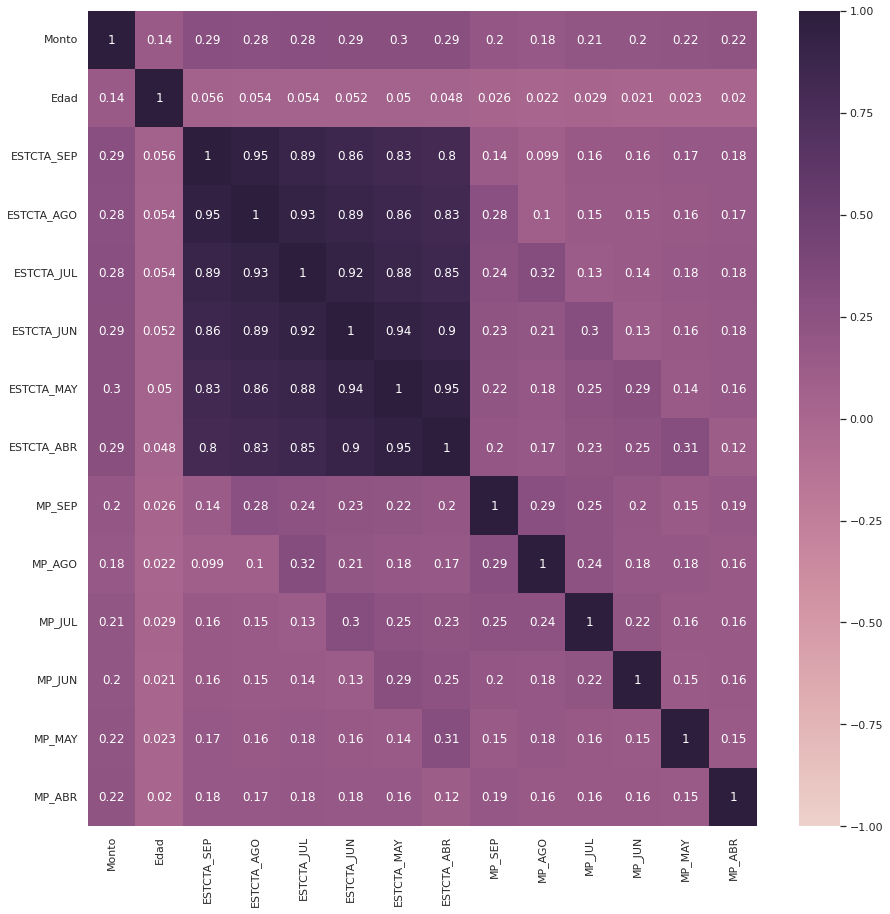

In [26]:
corrs = Conteo_num.corr()
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = sns.cubehelix_palette(as_cmap=True), annot= True)

#**Histograma**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0951fced0>,
      dtype=object)

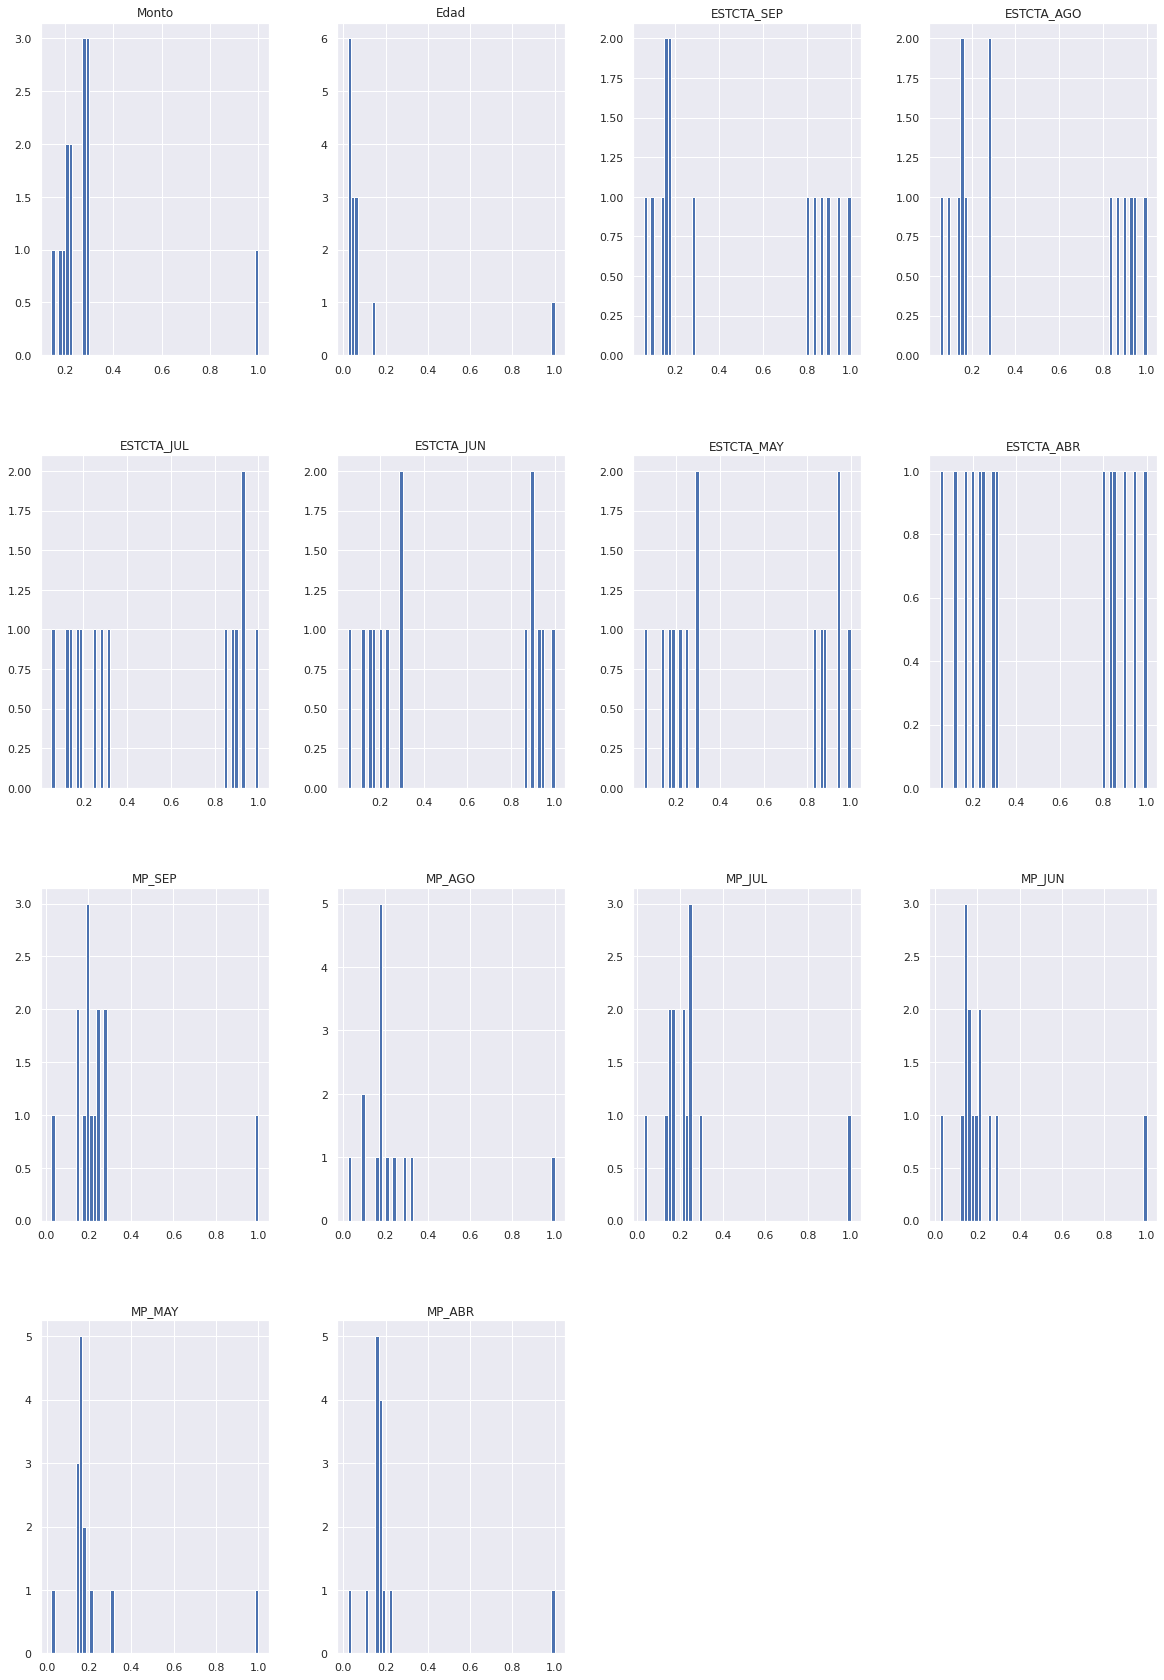

In [99]:
comps_df.hist(bins = 60, figsize=(20,30))

#**Dispersión**

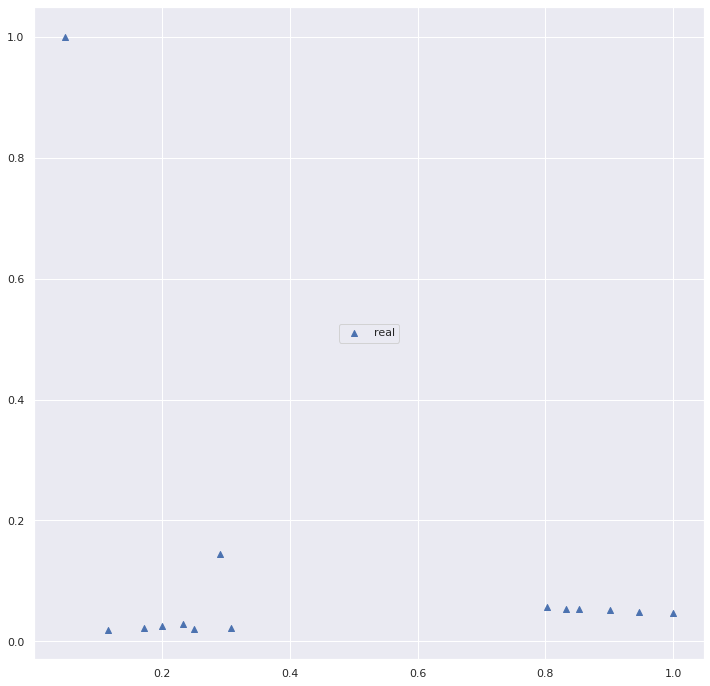

In [129]:
plt.scatter(comps_df.ESTCTA_ABR, np.ravel(comps_df.Edad), marker='^', label='real') 
plt.legend(loc=10)
plt.show()